

# Project: Investigate TMDB Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Cleaning</a></li>
<li><a href="#eda">Explore Data Relationships</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.
Explore this data to find out:
1. Which production-related feature are associated with higher user rating: release year, run length, genre, ...?
2. Is there a strong correlation between movie review rating and its box office revenue?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data cleaning



### General Inspection

First, load the data:

In [72]:
df = pd.read_csv('tmdb-movies.csv')

Check the data for get an idea what it looks like:

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


There is a lot of information about each movie in the dataset: id, name, director(s), vote_average, ..
According the dataset notes, the final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
Now find out how many movies are in the dataset, and how many features are associated with each one:

In [5]:
df.shape

(10866, 21)

Out of cruriosity, look up which years the movie data contains:

In [6]:
df.release_year.describe()

count    10866.000000
mean      2001.322658
std         12.812941
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

TMDB movies dataset contains information about movies dating from 1960 to 2015.

### Cleaning the Movies Dataset

First find out the quality of the data, specifically how many missing values are in the dataset.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Columns such as id, homepage, director, tagline, keywords, production companies, have null values. 

In the dataset, column 'id', 'imdb_id' are not useful to the investigation. 'budget' and 'revenue' are not needed any more, given 'budget_adj' and 'revenue_adj' are present. 'cast', 'director', 'keywords', 'production_companies', 'overview', 'homepage', 'tagline' are not interesting for the analysis. 'release_date' is not needed, given 'release_year' is in the dataset.

In [75]:
df.drop(columns = ['id','imdb_id','budget','revenue','cast','keywords','production_companies','overview','homepage','tagline','release_date'], inplace= True) 

Check the dataset again:

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 849.0+ KB


Now only 'genres' column has null values. It is not the focus of the analysis for now, so no rows need to dropped at this point.
Check duplicated rows:

In [77]:
df.duplicated().sum()

1

Only 1 row is duplicated. Remove the duplicate row.

In [78]:
df.drop_duplicates(inplace = True)

The dataset is ready for analysis.

<a id='eda'></a>
## Explore Data Relationships


### Relationship Between Production-Related Features and User Rating

Here 'user rating' refers to the 'vote_average' column. 'Revenue' refers to the 'revenue_adj' column. First, check out the user rating distribution:

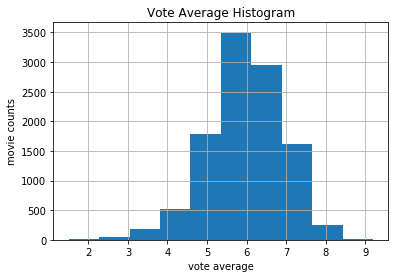

In [79]:
ax = df.vote_average.hist()
ax.set_xlabel('vote average')
ax.set_ylabel('movie counts')
ax.set_title('Vote Average Histogram') ;

The user rating distribution is bell-shaped and left skewed, with its center around 6.
To find out the mean of user ratings:

In [80]:
vote_mean = df.vote_average.mean()
vote_mean

5.975011504832047

#### Movie Budget and User Rating

First question one may ask is: does movie budget have a strong correlation with movie rating?
In order to investigate this relationship, first look at the scatter plot of these two features:

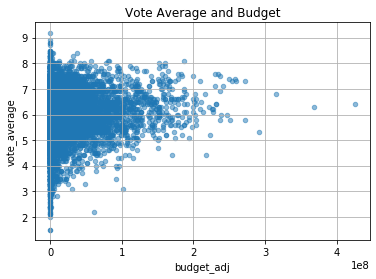

In [122]:
ax = df.plot.scatter('budget_adj','vote_average',alpha = 0.5,grid = True)
ax.set_title('Vote Average and Budget');

It's not clear from the scatter-plot whether these 2 features are correlated. Next step is to numerically identify the relationship.
First, take a look at budget distribution:

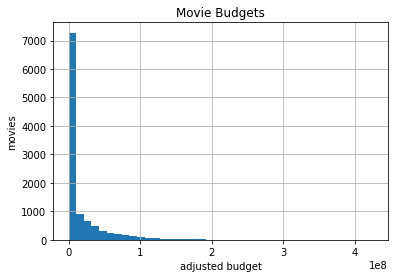

In [82]:
ax = df.budget_adj.hist(bins = 40)
ax.set_xlabel('adjusted budget')
ax.set_ylabel('movies')
ax.set_title('Movie Budgets');

The budget is right-skewed, with majority having less than $10 million budget.
Now find out if higher budget is associated with higher user rating, by comparing user rating average of all movies, against that of the movies that have higher budget.
Mean of user rating of all movies has been computed before.
Now computer mean budget of all movies:

In [83]:
budget_mean = df.budget_adj.mean()
budget_mean

17549894.037320614

Select a subset of the dataset with budget higher than budget mean of all movies:

In [84]:
bg_high = df[df['budget_adj']>budget_mean]

Computer the budget mean and user-rating mean of the subset with 'higher budget':

In [85]:
budget_high_mean = bg_high.budget_adj.mean()
high_b_v_mean = bg_high.vote_average.mean()
print(budget_high_mean)
print(high_b_v_mean)

58865966.27824834
6.109482178883659


With higher budgets, the user rating average is slightly higher than average of all the movies.
Plot this relationship in a bar plot:

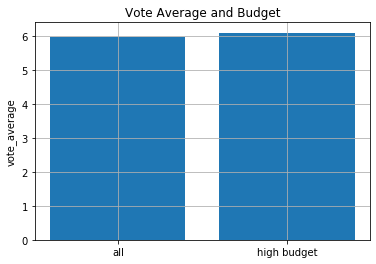

In [121]:
x_v=['all','high budget']
plt.bar(x_v,[vote_mean, high_b_v_mean])
plt.ylabel('vote_average')
plt.title('Vote Average and Budget')
plt.grid(True); 

>**Conclusion**: movie rating is slightly positively correlated with budget.


#### Movie Runtime and User Rating

Now investigate whether movie runtime impacts user rating.
First, scatter plot movie runtime and user rating:

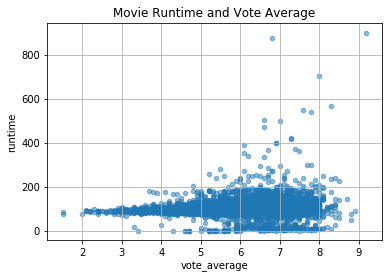

In [120]:
df.plot.scatter('vote_average','runtime',alpha = 0.5, title = 'Movie Runtime and Vote Average',grid = True);

Using similar techniques as in the previous investigation, find out if higher runtime (movies with runtime > mean) is associated with higher user rating, compared with average of all movies.

In [88]:
runtime_mean = df.runtime.mean()
print(runtime_mean)

102.07179015186378


The mean of runtime for all movies is 102 mins. Next select all movies with runtime greater than this average, find out the user rating average for those movies.

In [89]:
high_runtime = df[df['runtime']>runtime_mean]
print(high_runtime.runtime.mean())
vote_h_t_mean = high_runtime.vote_average.mean()
print(vote_h_t_mean)

122.83217410814449
6.268005384787982


Movies of longer runtime have average runtime of 123 mins. 

The user rating average for movies of longer runtime is 6.27, which is a little higher than all movies average.

Demonstrate this relationship in a bar plot:

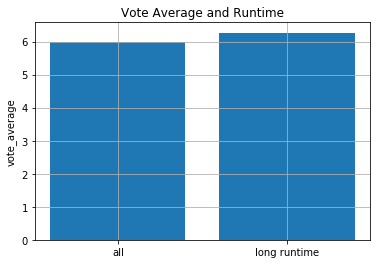

In [119]:
x_t = ['all','long runtime']
y_t = [vote_mean, vote_h_t_mean]
plt.bar(x_t, y_t)
plt.ylabel('vote_average')
plt.title('Vote Average and Runtime')
plt.grid(True); 

>**Conclusion**: longer runtime is associated with higher user rating of the movies.


#### User Rating of Movies Over Time

Do recent year movies get higher ratings from users?

To answer this, first group the dataset into subsets of different decades, from 1960's to 2010's

In [91]:
df['decade'] = df.release_year.apply(lambda x: x//10*10)
df.head()

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,2010
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,2010
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,2010


In [92]:
ratings = df.groupby('decade')['vote_average'].mean()
ratings

decade
1960    6.246133
1970    6.367323
1980    6.079398
1990    5.999263
2000    5.921224
2010    5.902996
Name: vote_average, dtype: float64

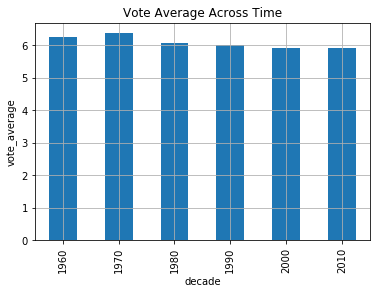

In [118]:
ax = ratings.plot(kind = 'bar',title = 'Vote Average Across Time',grid = True);
ax.set_ylabel('vote_average'); 

>**Conclusion**: there is actually a slight decrease in movie user ratings over the decades from the 1960's to the 2010's.

#### Highly-Rated Genres 

Certain movie genres are rated higher than others. Do these genres change over time?

To answer the question, first look at information about the genres column of the dataset.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
decade            10865 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 1018.6+ KB


The 'genres' column has some null values. Remove those rows.

In [95]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
decade            10800 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 1012.5+ KB


Now the dataset is 'clean'. Take a look at the values in genres column:

In [96]:
df.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

The values in the genres column typically contain many values. Pick the first one as the 'genre' of the movie.

In [97]:
df['genre'] = df.genres.apply(lambda x: x.split('|')[0])
df.head()

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade,genre
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Action
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010,Action
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,2010,Adventure
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,2010,Action
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,2010,Action


Remove the 'genres' column as it is no longer needed.

In [98]:
df.drop(columns = 'genres', inplace = True)
df.head()

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade,genre
0,32.985763,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Action
1,28.419936,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2010,Action
2,13.112507,Insurgent,Robert Schwentke,119,2480,6.3,2015,1.012000e+08,2.716190e+08,2010,Adventure
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09,2010,Action
4,9.335014,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,2010,Action


To find out how highly rated genre change over time, focus on 2 time periods: 1960's and 2010's, and compare highly rated genres for these 2 periods.

First extract movies of the 2 decades of interest:

In [99]:
df2010 = df[df.decade == 2010]
df1960 = df[df.decade == 1960]
df2010.head()

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade,genre
0,32.985763,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Action
1,28.419936,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2010,Action
2,13.112507,Insurgent,Robert Schwentke,119,2480,6.3,2015,1.012000e+08,2.716190e+08,2010,Adventure
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09,2010,Action
4,9.335014,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,2010,Action


First take a look at the user ratings average for different genres in 2010's:

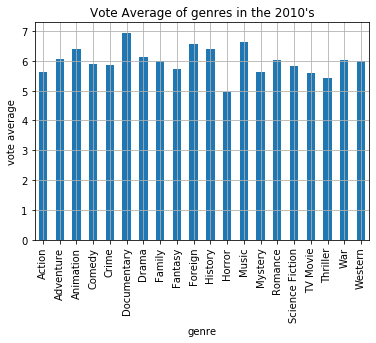

In [117]:
genre_vote_2010 = df2010.groupby('genre')['vote_average'].mean()
ax = genre_vote_2010.plot(kind = 'bar', title= "Vote Average of genres in the 2010's",grid = True)
ax.set_ylabel('vote average');

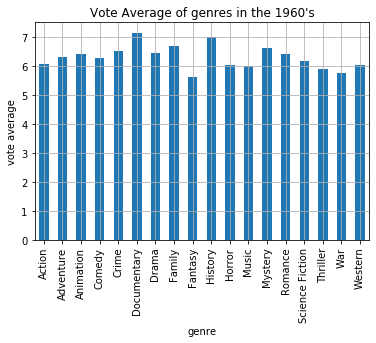

In [116]:
genre_vote_1960 = df1960.groupby('genre')['vote_average'].mean()
ax = genre_vote_1960.plot(kind = 'bar', title= "Vote Average of genres in the 1960's",grid = True)
ax.set_ylabel('vote average');

The patterns of user ratings vs. genre do change between the 2 time periods. To get accurate observations, look at the numeric values.

In [102]:
genre_vote_1960.sort_values(ascending = False)

genre
Documentary        7.150000
History            7.000000
Family             6.700000
Mystery            6.633333
Crime              6.511765
Drama              6.456410
Romance            6.425000
Animation          6.416667
Adventure          6.312903
Comedy             6.260811
Science Fiction    6.166667
Action             6.050000
Western            6.040000
Horror             6.022581
Music              6.000000
Thriller           5.892308
War                5.750000
Fantasy            5.628571
Name: vote_average, dtype: float64

In [103]:
genre_vote_2010.sort_values(ascending = False)

genre
Documentary        6.947893
Music              6.636364
Foreign            6.550000
Animation          6.409929
History            6.409524
Drama              6.115347
Adventure          6.049265
War                6.040909
Romance            6.029670
Western            6.000000
Family             5.990323
Comedy             5.877387
Crime              5.866990
Science Fiction    5.822619
Fantasy            5.724194
Action             5.641951
Mystery            5.618605
TV Movie           5.587097
Thriller           5.415714
Horror             4.955840
Name: vote_average, dtype: float64

>**Conclusion**: 'Documentary' is the highest-rated genre in both time periods. The highest-rated genres after that are 'History', 'Family', 'Mystery' and 'Crime' for the 1960's, but 'Music', 'Foreign', 'History' and 'Animation' for the 2010's. People's tastes for movies have changed quite a bit over the decades. 

### Relationship Between User Rating and Revenue

As one may imagine, user ratings of a movie likely affects its box office. Does the data agree with that? Let's find out.

First, take a look at the distribution of the revenue.

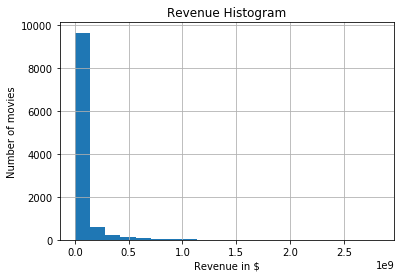

In [115]:
plt.hist(df.revenue_adj,bins = 20)
plt.title('Revenue Histogram')
plt.xlabel('Revenue in $')
plt.ylabel('Number of movies')
plt.grid(True);

Then, scatter plot revenue with vote_average.

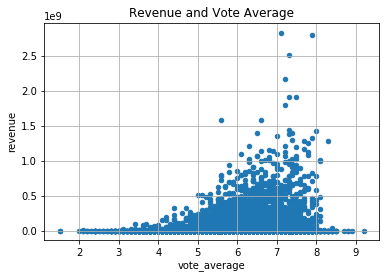

In [114]:
ax = df.plot.scatter('vote_average','revenue_adj', title = 'Revenue and Vote Average', grid = True)
ax.set_xlabel('vote_average')
ax.set_ylabel('revenue');

In [106]:
df['usr_r']=df.vote_average.apply(int)
df.head()

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade,genre,usr_r
0,32.985763,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Action,6
1,28.419936,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2010,Action,7
2,13.112507,Insurgent,Robert Schwentke,119,2480,6.3,2015,1.012000e+08,2.716190e+08,2010,Adventure,6
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09,2010,Action,7
4,9.335014,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,2010,Action,7


'usr_r' is the 'vote_average' rounded down to integer, and represent user review grade.

Find out revenue average for each user rating grade, and plot them.

In [107]:
rev_m = df.groupby('usr_r')['revenue_adj'].mean()
rev_m

usr_r
1    0.000000e+00
2    2.646554e+05
3    3.712962e+06
4    9.799389e+06
5    3.370862e+07
6    6.216557e+07
7    1.049260e+08
8    1.085214e+08
9    0.000000e+00
Name: revenue_adj, dtype: float64

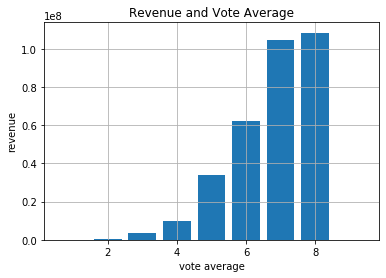

In [113]:
plt.bar(rev_m.index, rev_m)
plt.xlabel('vote average')
plt.ylabel('revenue')
plt.title('Revenue and Vote Average')
plt.grid(True);

>**Conclusion**: there is strong indication that higher user rating associates with higher box office revenue.

In [109]:
df.budget_adj.describe()

count    1.080000e+04
mean     1.765437e+07
std      3.438403e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.103337e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [110]:
df.query('budget_adj < 1e+6').shape[0]/df.shape[0]

0.5519444444444445

In [111]:
df.director.value_counts()

Woody Allen                           45
Clint Eastwood                        34
Martin Scorsese                       29
Steven Spielberg                      29
Ridley Scott                          23
                                      ..
Steven Jacobson                        1
Gregory Doran                          1
FranÃ§ois Desagnat|Thomas Sorriaux     1
Charles Crichton                       1
Nick Ormerod|Declan Donnellan          1
Name: director, Length: 5056, dtype: int64

In [112]:
df.director.value_counts().describe()

count    5056.000000
mean        2.136076
std         2.526159
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        45.000000
Name: director, dtype: float64

<a id='conclusions'></a>
## Conclusions

**Results**: Here is a summary of the findings of this investigation of movies dataset:

* Movies with higher budget has slightly higher user ratings.

* Longer runtime is associated with higher user rating.
 
* There is actually a slight decrease in user ratings over the decades from 1960's to 2010's.
 
* As to genres, 'Documentary' is the highest-rated genre in both 1960's and 2010's. The highest-rated genres after that are 'History', 'Family', 'Mystery' and 'Crime' for the 1960's, but 'Music', 'Foreign', 'History' and 'Animation' for the 2010's. People's tastes for movies have changed quite a bit between 1960's and 2010's.

* There is strong indication that higher user rating associates with higher box office revenue.

**Limitations**: Some limitations observed in the analysis:

* The data is very complex, in terms of varieties and range of distributions, which made it hard to find correlation. 

* There are over 5000 distinct movie director(s), 75% of which has made 2 movies or less. This means average movie review rating for each director is statistically insignificant for most of them.

* Some distributions are very skewd. For example, the budget_adj of movies has max value of \\$425M, while 55% of the values are below \\$1M.